In [22]:
import pandas as pd
import os

data_path = 'data/us_superstore_data.xls'

df = pd.read_excel(data_path)
df.head()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [23]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
num_orders = len(df)
num_customers = df['Customer ID'].nunique()
avg_order_value = total_sales / num_orders

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Total Profit: ${total_profit:,.0f}")
print(f"Number of Orders: {num_orders:,}")
print(f"Unique Customers: {num_customers}")
print(f"Average Order Value: ${avg_order_value:,.2f}")

Total Sales: $2,297,201
Total Profit: $286,397
Number of Orders: 9,994
Unique Customers: 793
Average Order Value: $229.86


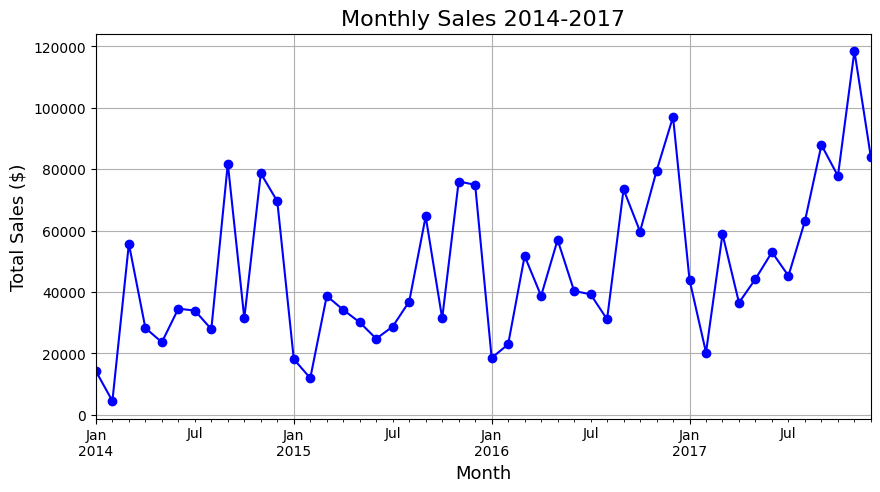

In [ ]:
import matplotlib.pyplot as plt

# Sales by Month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales 2014-2017', fontsize=16)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total Sales ($)', fontsize=13)
plt.grid(True)
plt.show()


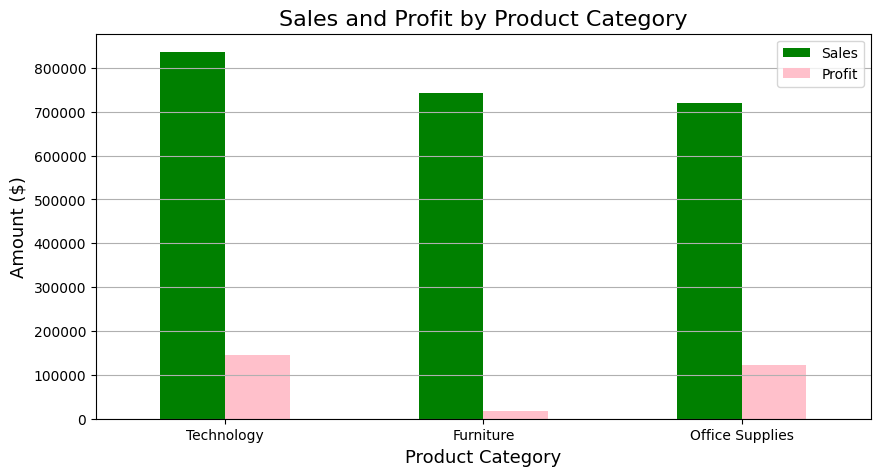

In [ ]:
# Sales and Profit by Category
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

category_summary.plot(kind='bar', figsize=(10,5), color=['green', 'pink'])
plt.title('Sales and Profit by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=13)
plt.ylabel('Amount ($)', fontsize=13)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


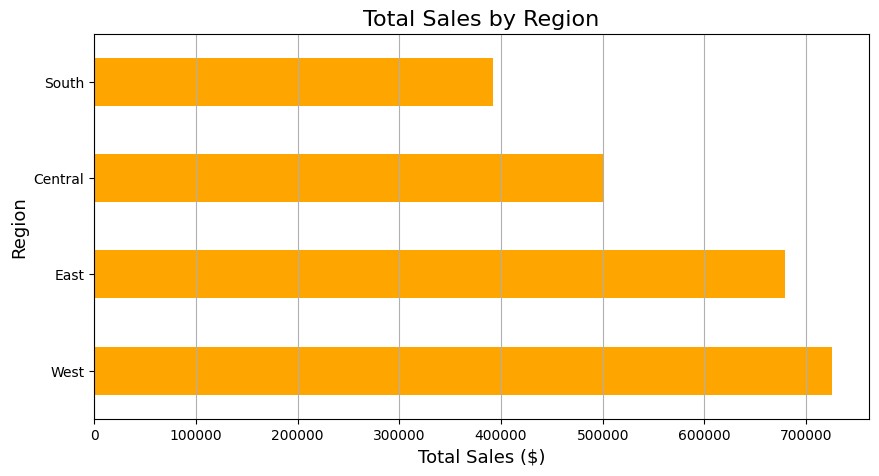

In [ ]:
# Total Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

region_sales.plot(kind='barh', figsize=(10, 5), color='orange')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=13)
plt.ylabel('Region', fontsize=13)
plt.grid(axis='x')
plt.show()

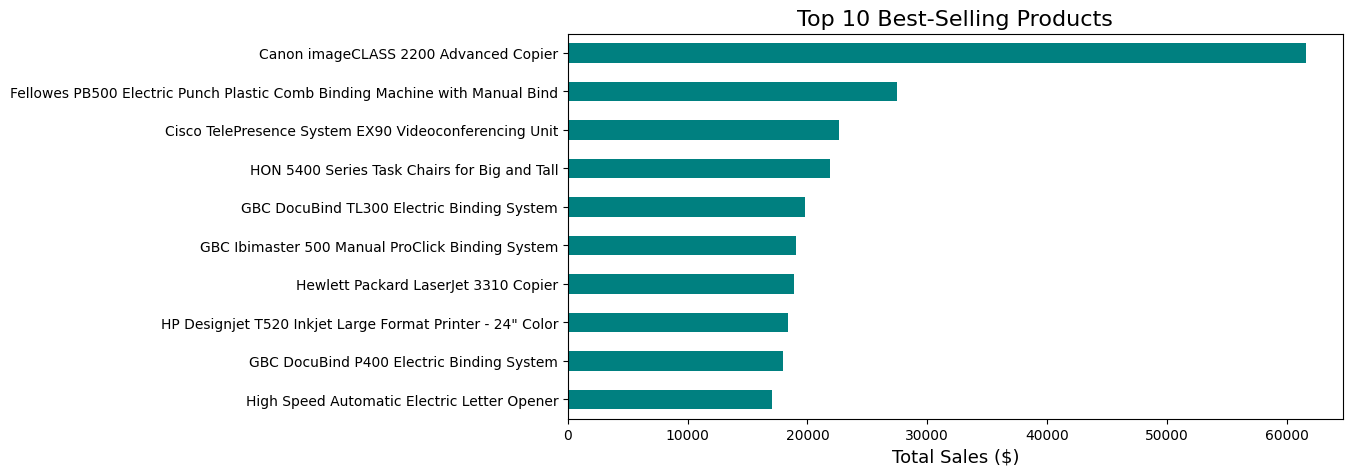

In [ ]:
# Top 10 Best Selling Products
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
top_products.plot(kind='barh', figsize=(10,5), color='teal')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=13)
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()


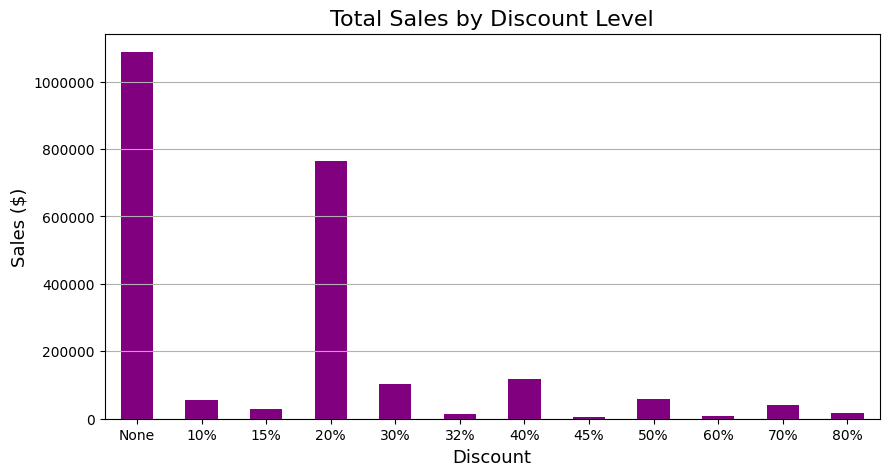

In [ ]:
# Total Sales by Discount Level
discount_sales = df.groupby('Discount')['Sales'].sum()
discount_sales.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Total Sales by Discount Level', fontsize=16)
plt.xticks(ticks=range(len(discount_sales)), 
           labels=['None', '10%', '15%', '20%', '30%', '32%', '40%', '45%', '50%', '60%', '70%', '80%'])
plt.xlabel('Discount', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Sales ($)', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y')
plt.show()

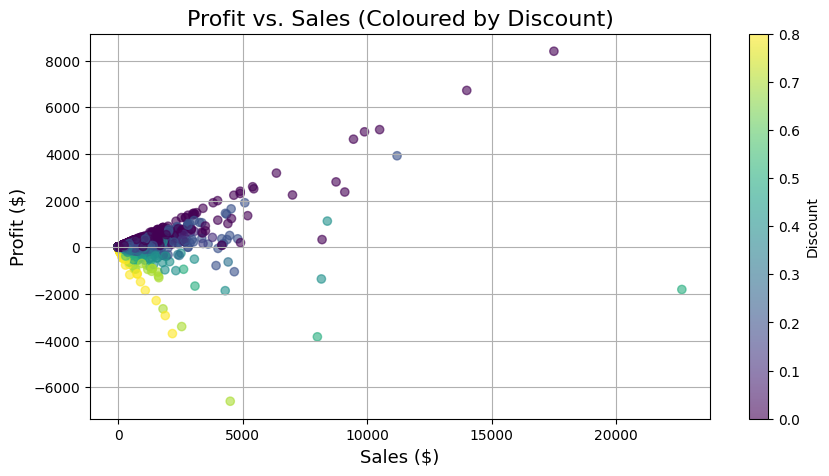

In [ ]:
# Plot Sales vs Profit of Discount Levels
plt.figure(figsize=(10,5))
plt.scatter(df['Sales'], df['Profit'], c=df['Discount'], cmap='viridis', alpha=0.6)
plt.title('Profit vs. Sales (Coloured by Discount)', fontsize=16)
plt.xlabel('Sales ($)', fontsize=13)
plt.ylabel('Profit ($)', fontsize=13)
plt.colorbar(label='Discount')
plt.grid(True)
plt.show()
